In [4]:
import gdown
import os
import zipfile

# --- Settings ---
file_id = "1s7v9qk38gHPU8V58kws9RNwstllbHNv5"
download_folder = "data"    # where the zip will be downloaded
extract_folder = "data"  # where contents will go
zip_filename = "data.zip"

# --- Make sure folders exist ---
os.makedirs(download_folder, exist_ok=True)
os.makedirs(extract_folder, exist_ok=True)

# --- Download ---
url = f"https://drive.google.com/uc?id={file_id}"
zip_path = os.path.join(download_folder, zip_filename)
gdown.download(url, zip_path, quiet=False)
print(f"✅ Downloaded zip to: {zip_path}")

# --- Extract ---
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Remove zip file after extraction
os.remove(zip_path)

print(f"✅ Extracted contents to: {extract_folder}")


Downloading...
From (original): https://drive.google.com/uc?id=1s7v9qk38gHPU8V58kws9RNwstllbHNv5
From (redirected): https://drive.google.com/uc?id=1s7v9qk38gHPU8V58kws9RNwstllbHNv5&confirm=t&uuid=31da061f-cd57-46bb-b331-bbf0257cfc91
To: c:\Users\Kornel\Github\cal-cones-model\model\data\data.zip
100%|██████████| 2.36G/2.36G [00:31<00:00, 74.7MB/s]


✅ Downloaded zip to: data\data.zip
✅ Extracted contents to: data


### Check

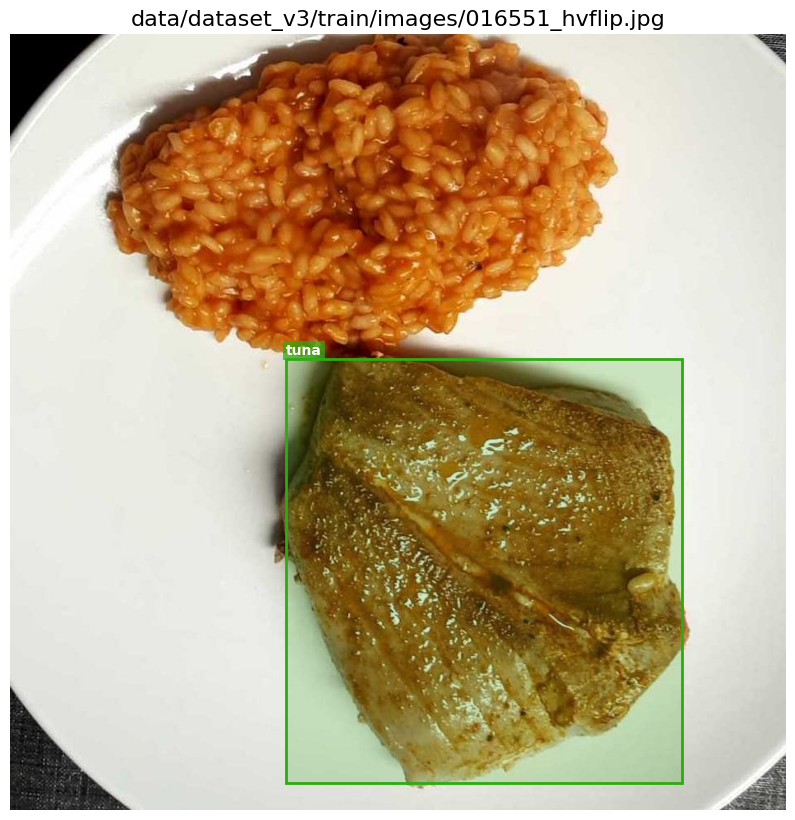

In [5]:
from model_utils import visualize_detections
import json
import random
import os

image_folder = "data/dataset_v3/train/images/"
labels_folder = "data/dataset_v3/train/labels/"

with open("pipeline_data/dicts/detect_classes_v3.json", 'r') as f:
    id_to_name = json.load(f)

for i in range(1):
    img_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]
    img_file = random.choice(img_files)
    label_file = img_file.replace('.jpg', '.txt')

    img_path = os.path.join(image_folder, img_file)
    label_path = os.path.join(labels_folder, label_file)

    visualize_detections(img_path, label_path, id_to_name)